# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab

# Functions

In [2]:
def create_model(X_train, y_train, X_test):
    logit = LogisticRegression()
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    return y_pred

In [3]:
def create_hist(samples, metric, per):
    plt.hist(x=samples[metric][per],  edgecolor = 'black')
    plt.title(f'{metric} dist. {float(per) * 100}% test size')
    plt.xlabel('value')
    plt.ylabel('count')
    plt.show()

In [213]:
def ttest(sample1, sample2):
    return st.ttest_ind(sample1, sample2).pvalue < 0.05

# Data 50/50

In [2]:
df = pd.read_csv('applerevenue .csv')
# df.head()
df['profit or not'].value_counts()

0    5528
1    5031
Name: profit or not, dtype: int64

In [6]:
df.rename(columns={'profit or not': 'profit'}, inplace=True)

<AxesSubplot:xlabel='profit', ylabel='count'>

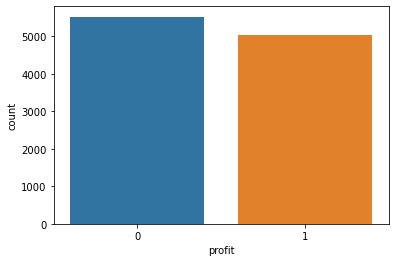

In [7]:
sns.countplot(x='profit', data=df)

## Different test size

In [8]:
d_samples = {
    'f1': {
        '0.1': [],
        '0.2': [],
        '0.3': [],
        '0.4': [],
    },
    'accuracy': {
        '0.1': [],
        '0.2': [],
        '0.3': [],
        '0.4': [],
    }
}

X = df[['open', 'high', 'low', 'close']]
y = df['profit']

In [9]:
for i in [0.1, 0.2, 0.3, 0.4]:
    for j in range(200): 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
        y_pred = create_model(X_train, y_train, X_test)
        
        key = str(i)

        d_samples['f1'][key].append(f1_score(y_test, y_pred))
        d_samples['accuracy'][key].append(accuracy_score(y_test, y_pred))

## Plots

### F1 score

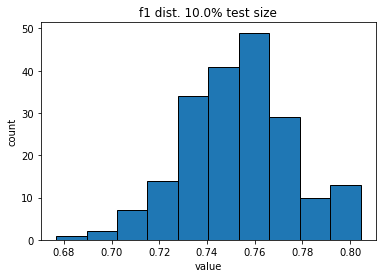

In [10]:
create_hist(d_samples, 'f1', '0.1')

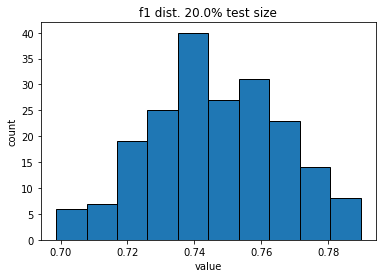

In [11]:
create_hist(d_samples, 'f1', '0.2')

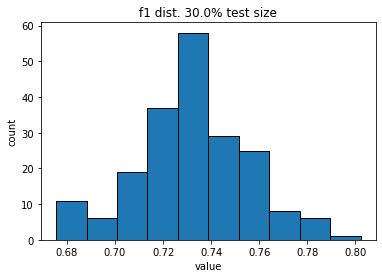

In [12]:
create_hist(d_samples, 'f1', '0.3')

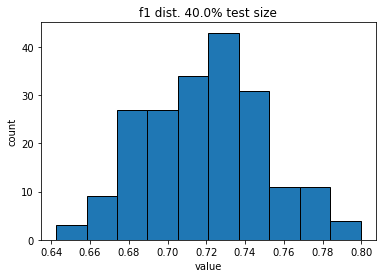

In [13]:
create_hist(d_samples, 'f1', '0.4')

### Accuracy

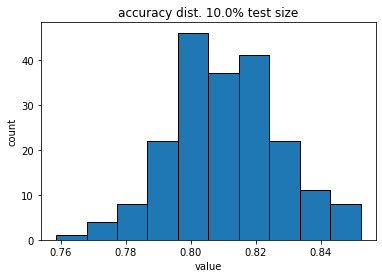

In [18]:
create_hist(d_samples, 'accuracy', '0.1')

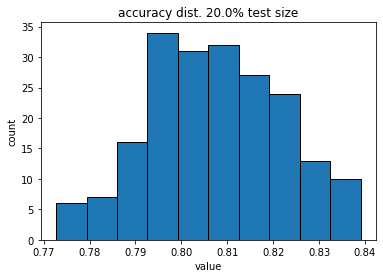

In [19]:
create_hist(d_samples, 'accuracy', '0.2')

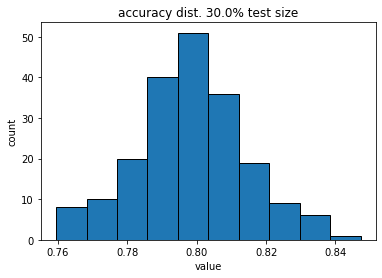

In [20]:
create_hist(d_samples, 'accuracy', '0.3')

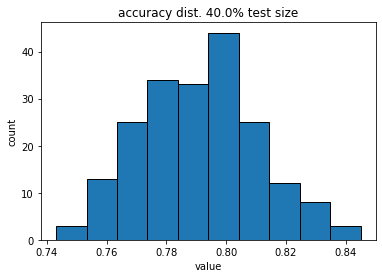

In [21]:
create_hist(d_samples, 'accuracy', '0.4')

# Data 70/30

In [22]:
df1 = df.copy(deep=True)

In [23]:
df1.rename(columns={'profit or not': 'profit'}, inplace=True)

In [24]:
df1['profit'].value_counts()

0    5528
1    5031
Name: profit, dtype: int64

In [25]:
df1 = df1.sort_values(by='profit')
df1

,date,open,high,low,close,volume,profit
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
5952,15-07-2004,0.4978,0.5127,0.4895,0.5020,1767724000,0
5951,14-07-2004,0.4400,0.4569,0.4381,0.4510,835800000,0
5947,08-07-2004,0.4593,0.4677,0.4566,0.4595,233380000,0
5944,02-07-2004,0.4642,0.4753,0.4532,0.4738,910683200,0
...,...,...,...,...,...,...,...
6256,27-09-2005,1.6440,1.6538,1.6291,1.6294,341703600,1
6255,26-09-2005,1.6474,1.6636,1.6257,1.6416,546562800,1
6253,22-09-2005,1.5840,1.5998,1.5648,1.5825,463727600,1
6248,15-09-2005,1.5245,1.5300,1.5041,1.5206,415156000,1


In [26]:
df1 = df1.iloc[:8000]

<AxesSubplot:xlabel='profit', ylabel='count'>

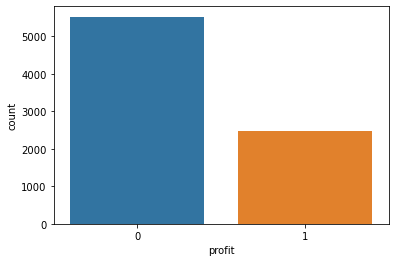

In [27]:
sns.countplot(x='profit', data=df1)

In [28]:
d1_samples = {
    'f1': {
        '0.1': [],
        '0.2': [],
        '0.3': [],
        '0.4': [],
    },
    'accuracy': {
        '0.1': [],
        '0.2': [],
        '0.3': [],
        '0.4': [],
    }
}

In [29]:
X1 = df1[['open', 'high', 'low', 'close']]
y1 = df1['profit']

## Different test size

In [30]:
for i in [0.1, 0.2, 0.3, 0.4]:
    for j in range(200): 
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=i)
        y1_pred = create_model(X1_train, y1_train, X1_test)
        
        key = str(i)

        d1_samples['f1'][key].append(f1_score(y1_test, y1_pred))
        d1_samples['accuracy'][key].append(accuracy_score(y1_test, y1_pred))

## Plots

### F1-score

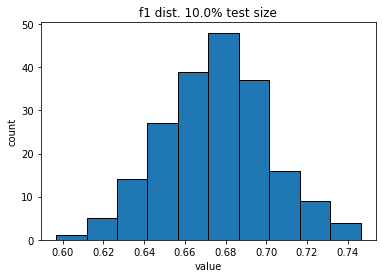

In [31]:
create_hist(d1_samples, 'f1', '0.1')

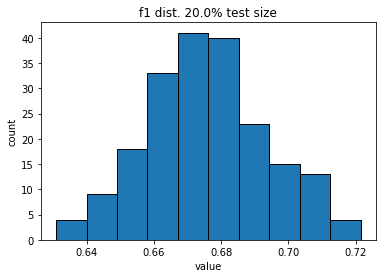

In [32]:
create_hist(d1_samples, 'f1', '0.2')

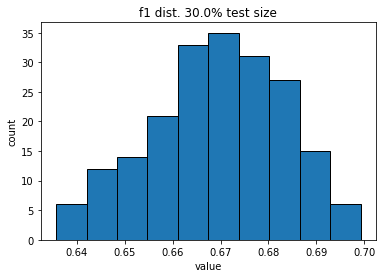

In [33]:
create_hist(d1_samples, 'f1', '0.3')

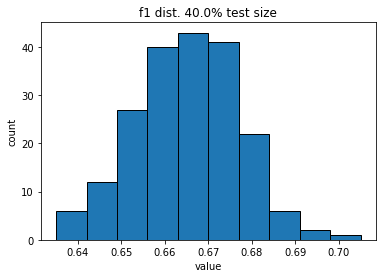

In [34]:
create_hist(d1_samples, 'f1', '0.4')

### Accuracy

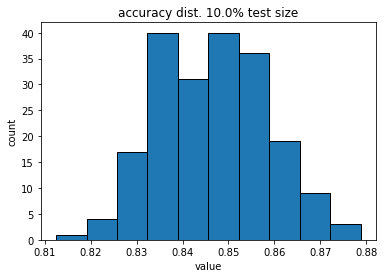

In [35]:
create_hist(d1_samples, 'accuracy', '0.1')

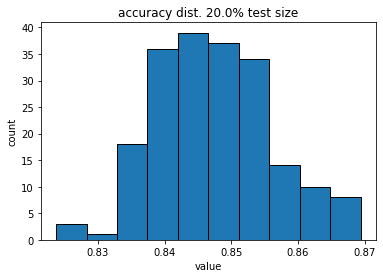

In [36]:
create_hist(d1_samples, 'accuracy', '0.2')

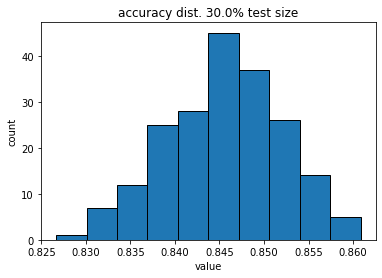

In [37]:
create_hist(d1_samples, 'accuracy', '0.3')

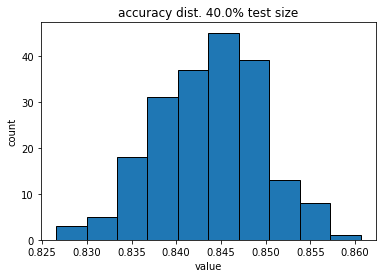

In [38]:
create_hist(d1_samples, 'accuracy', '0.4')

# Analysis

## 50/50 (исследование 1)

In [260]:
diff = []
f1 = []
f1_means = []

accuracy = []
accuracy_means = []

for i in ['0.1', '0.2', '0.3', '0.4']:
    sample_f1 = np.array(d_samples['f1'][i])
    sample_acc = np.array(d_samples['accuracy'][i])
    
    diff.append(np.absolute(sample_f1.mean() - sample_acc.mean()))
    f1.extend(sample_f1)
    accuracy.extend(sample_acc)
    f1_means.append(sample_f1.mean())
    accuracy_means.append(sample_acc.mean())
    
    
    ci_f1 = st.t.interval(alpha=0.95, df=len(sample_f1) - 1, loc=np.mean(sample_f1), scale=st.sem(sample_f1))
    ci_acc = st.t.interval(alpha=0.95, df=len(sample_acc) - 1, loc=np.mean(sample_acc), scale=st.sem(sample_acc))
    
    print(f'test-size: {float(i) * 100}%')
    print(f'CI F1-score: {ci_f1}\n\tПринадлежит: {ci_f1[0] <= sample_f1.mean() <= ci_f1[1]}')
    print(f'CI accuracy: {ci_acc}\n\tПринадлежит: {ci_acc[0] <= sample_acc.mean() <= ci_acc[1]}')
    print(f'Разность между средними f1-score и accuracy: {np.absolute(sample_f1.mean() - sample_acc.mean())}')
    print(f'Среднее значение F1-score: {sample_f1.mean()}')
    print(f'Среднее значение accuracy: {sample_acc.mean()}')
    print('-'*30)

diff = np.array(diff)
print(f'Средняя разность между значениями метрик f1 и accuracy: {diff.mean()}')
print('-'*30)
print(f'Среднеее значение F1 метрики по всем выборкам: {np.array(f1).mean()}')
print('-'*30)
print(f'Среднеее значение accuracy метрики по всем выборкам: {np.array(accuracy).mean()}')
print('-'*30)
print(f'Стандартное отклонение F1-score для средних: {np.std(np.array(f1_means))}')
print('-'*30)
print(f'Стандартное отклонение accuracy для средних: {np.std(np.array(accuracy_means))}')

test-size: 10.0%
CI F1-score: (0.7497071243145202, 0.755977577418434)
	Принадлежит: True
CI accuracy: (0.8087664623364225, 0.8134873255423652)
	Принадлежит: True
Разность между средними f1-score и accuracy: 0.05828454307291675
Среднее значение F1-score: 0.7528423508664771
Среднее значение accuracy: 0.8111268939393939
------------------------------
test-size: 20.0%
CI F1-score: (0.7435253618209083, 0.7490672837291044)
	Принадлежит: True
CI accuracy: (0.8052518675381715, 0.8093077915527374)
	Принадлежит: True
Разность между средними f1-score и accuracy: 0.06098350677044806
Среднее значение F1-score: 0.7462963227750063
Среднее значение accuracy: 0.8072798295454544
------------------------------
test-size: 30.0%
CI F1-score: (0.7287460476027015, 0.735123780489989)
	Принадлежит: True
CI accuracy: (0.7959231992664433, 0.8003994017436578)
	Принадлежит: True
Разность между средними f1-score и accuracy: 0.06622638645870527
Среднее значение F1-score: 0.7319349140463453
Среднее значение accuracy:

In [282]:
print('t-test for f1 10% and f1 20%: ', st.ttest_ind(d_samples['f1']['0.1'], d_samples['f1']['0.2']).pvalue)
print('t-test for f1 20% and f1 30%: ', st.ttest_ind(d_samples['f1']['0.2'], d_samples['f1']['0.3']).pvalue)
print('t-test for f1 30% and f1 40%: ', st.ttest_ind(d_samples['f1']['0.3'], d_samples['f1']['0.4']).pvalue)

t-test for f1 10% and f1 20%:  0.002177470995114249
t-test for f1 20% and f1 30%:  6.978867151771203e-11
t-test for f1 30% and f1 40%:  4.6976672452374085e-06


In [279]:
print('t-test for accuracy 10% and f1 20%: ', st.ttest_ind(d_samples['accuracy']['0.1'], d_samples['accuracy']['0.2']).pvalue)
print('t-test for accuracy 20% and f1 30%: ', st.ttest_ind(d_samples['accuracy']['0.2'], d_samples['accuracy']['0.3']).pvalue)
print('t-test for accuracy 30% and f1 40%: ', st.ttest_ind(d_samples['accuracy']['0.3'], d_samples['accuracy']['0.4']).pvalue)

t-test for accuracy 10% and f1 20%:  0.01521487657625411
t-test for accuracy 20% and f1 30%:  5.762864412588538e-09
t-test for accuracy 30% and f1 40%:  0.00012918797417599072


### Conslusion 

Из приведенных выше статистик можно сделать вывод, что при увеличении тестовых данных модели, где метки классифкации распределены равномерно, разность между метриками F1 и accuracy увеличивается в среднем на 0.05, так как стандартное отклонение F1 больше, чем стандратное отклонение accuracy. Значения метрик F1 и accuracy по отдельности же уменьшаются в среднем на 0.01 и 0.07 соответственно. Так же по t-тесту можно сделать вывод, что различия между средними ГС и выборкой достоверны. Стоит так же обратить внимание, что метрика accuracy всегда больше F1-score.

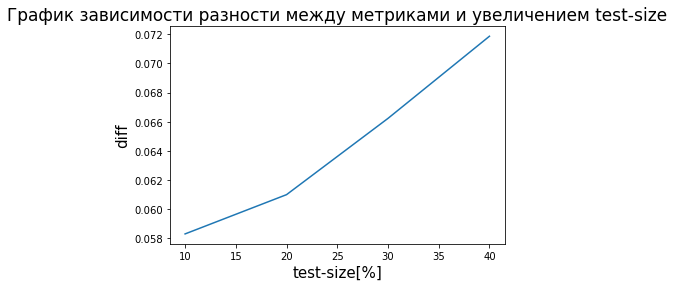

In [211]:
plt.plot(np.array([10, 20, 30, 40]), diff)
plt.title('График зависимости разности между метриками и увеличением test-size', fontsize=17)
plt.xlabel('test-size[%]', fontsize=15)
plt.ylabel('diff', fontsize=15)
plt.show()

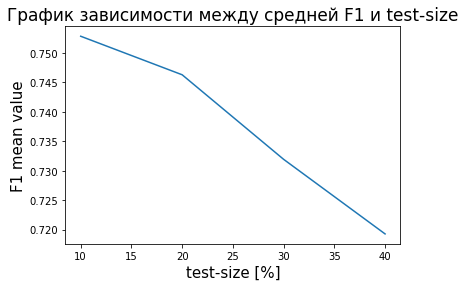

In [257]:
plt.plot(np.array([10, 20, 30, 40]), f1_means)
plt.title('График зависимости между средней F1 и test-size', fontsize=17)
plt.xlabel('test-size [%]', fontsize=15)
plt.ylabel('F1 mean value', fontsize=15)
plt.show()

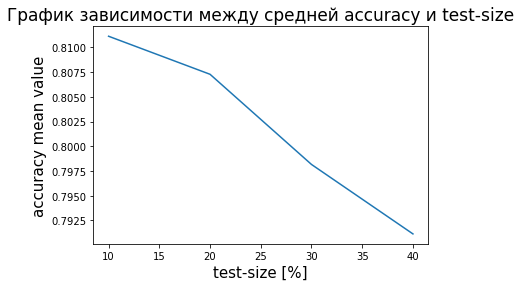

In [258]:
plt.plot(np.array([10, 20, 30, 40]), accuracy_means)
plt.title('График зависимости между средней accuracy и test-size', fontsize=17)
plt.xlabel('test-size [%]', fontsize=15)
plt.ylabel('accuracy mean value', fontsize=15)
plt.show()

**Итог**: при увеличении test-size, при условии, что метки в исходном наборе данных распределены равномерно, значения метрик уменьшаетя, при чем accuracy будет показывать большее значение, чем F1|

## 70/30 (исследование 2)

In [288]:
diff1 = []

f1n = []
f1n_means = []

accuracyn = []
accuracyn_means = []

for i in ['0.1', '0.2', '0.3', '0.4']:
    sample_f1n = np.array(d1_samples['f1'][i])
    sample_accn = np.array(d1_samples['accuracy'][i])
    
    diff1.append(np.absolute(sample_f1n.mean() - sample_accn.mean()))
    f1n.extend(sample_f1n)
    accuracyn.extend(sample_accn)
    f1n_means.append(sample_f1n.mean())
    accuracyn_means.append(sample_accn.mean())
    
    ci_f1n = st.t.interval(alpha=0.95, df=len(sample_f1n) - 1, loc=np.mean(sample_f1n), scale=st.sem(sample_f1n))
    ci_accn = st.t.interval(alpha=0.95, df=len(sample_accn) - 1, loc=np.mean(sample_accn), scale=st.sem(sample_accn))
    
    print(f'test-size: {float(i) * 100}%')
    print(f'CI F1-score: {ci_f1n}\n\tПринадлежит: {ci_f1n[0] <= sample_f1n.mean() <= ci_f1n[1]}')
    print(f'CI accuracy: {ci_accn}\n\tПринадлежит: {ci_accn[0] <= sample_accn.mean() <= ci_accn[1]}')
    print(f'Разность между средними f1-score и accuracy: {np.absolute(sample_f1n.mean() - sample_accn.mean())}')
    print(f'Среднее значение F1-score: {sample_f1n.mean()}')
    print(f'Среднее значение accuracy: {sample_accn.mean()}')
    print('-'*30)
    
diff1 = np.array(diff1)
print(f'Средняя разность между значениями метрик F1 и accuracy: {diff1.mean()}')
print('-'*30)
print(f'Среднеее значение F1 метрики по всем выборкам: {np.array(f1n).mean()}')
print('-'*30)
print(f'Среднеее значение accuracy метрики по всем выборкам: {np.array(accuracyn).mean()}')
print('-'*30)
print(f'Стандартное отклонение F1-score для средних: {np.std(np.array(f1n_means))}')
print('-'*30)
print(f'Стандартное отклонение accuracy для средних: {np.std(np.array(accuracyn_means))}')

test-size: 10.0%
CI F1-score: (0.6715895512566387, 0.6788922811072972)
	Принадлежит: True
CI accuracy: (0.8451078391137323, 0.8484171608862676)
	Принадлежит: True
Разность между средними f1-score и accuracy: 0.17152158381803206
Среднее значение F1-score: 0.6752409161819679
Среднее значение accuracy: 0.8467625
------------------------------
test-size: 20.0%
CI F1-score: (0.6734285382953129, 0.6783212361375752)
	Принадлежит: True
CI accuracy: (0.8463572194041644, 0.8488052805958357)
	Принадлежит: True
Разность между средними f1-score и accuracy: 0.171706362783556
Среднее значение F1-score: 0.6758748872164441
Среднее значение accuracy: 0.8475812500000001
------------------------------
test-size: 30.0%
CI F1-score: (0.6677225987882933, 0.6715568235890703)
	Принадлежит: True
CI accuracy: (0.8444942853622105, 0.846301547971123)
	Принадлежит: True
Разность между средними f1-score и accuracy: 0.17575820547798493
Среднее значение F1-score: 0.6696397111886818
Среднее значение accuracy: 0.8453979

In [278]:
print('t-test for f1 10% and f1 20%: ', st.ttest_ind(d1_samples['f1']['0.1'], d1_samples['f1']['0.2']).pvalue)
print('t-test for f1 20% and f1 30%: ', st.ttest_ind(d1_samples['f1']['0.2'], d1_samples['f1']['0.3']).pvalue)
print('t-test for f1 30% and f1 40%: ', st.ttest_ind(d1_samples['f1']['0.3'], d1_samples['f1']['0.4']).pvalue)

t-test for f1 10% and f1 20%:  0.7762185091046672
t-test for f1 20% and f1 30%:  9.02215941779078e-05
t-test for f1 30% and f1 40%:  0.0006421055644838293


In [284]:
print('t-test for accuracy 10% and f1 20%: ', st.ttest_ind(d1_samples['accuracy']['0.1'], d1_samples['accuracy']['0.2']).pvalue)
print('t-test for accuracy 20% and f1 30%: ', st.ttest_ind(d1_samples['accuracy']['0.2'], d1_samples['accuracy']['0.3']).pvalue)
print('t-test for accuracy 30% and f1 40%: ', st.ttest_ind(d1_samples['accuracy']['0.3'], d1_samples['accuracy']['0.4']).pvalue)

t-test for accuracy 10% and f1 20%:  0.4332453536110441
t-test for accuracy 20% and f1 30%:  0.004893148259355645
t-test for accuracy 30% and f1 40%:  0.00590012242170861


### Conclusion

При увеличении тестового набора данных, при условии, что метки распределены неравномерно в исходном наборе данных, метрики практически не изменяются. Это высказывание подтверждается тем, что t-test не выявил различий между выборками с 10% и 20% test-size для обеих метрик. 

F1 метрика в среднем отклоняется на 0.004, а accuracy на 0.001.

Так же видно по средней разности между метриками и по их значениям, что при использовании только одной метрики для оценки качетва модели, можно прийти к неверным выводам

С увеличением тестового набора данных, так же увеличивается разность между метриками, так как accuracy отклоняется в среднем меньше, чем F1

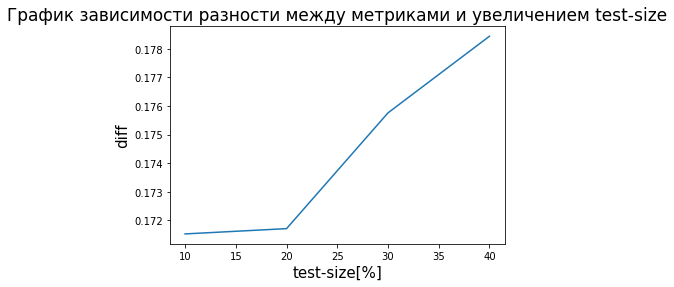

In [289]:
plt.plot(np.array([10, 20, 30, 40]), diff1)
plt.title('График зависимости разности между метриками и увеличением test-size', fontsize=17)
plt.xlabel('test-size[%]', fontsize=15)
plt.ylabel('diff', fontsize=15)
plt.show()

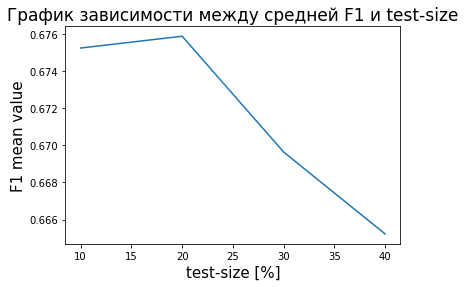

In [286]:
plt.plot(np.array([10, 20, 30, 40]), f1n_means)
plt.title('График зависимости между средней F1 и test-size', fontsize=17)
plt.xlabel('test-size [%]', fontsize=15)
plt.ylabel('F1 mean value', fontsize=15)
plt.show()

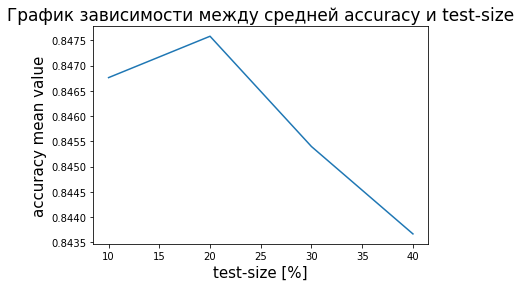

In [287]:
plt.plot(np.array([10, 20, 30, 40]), accuracyn_means)
plt.title('График зависимости между средней accuracy и test-size', fontsize=17)
plt.xlabel('test-size [%]', fontsize=15)
plt.ylabel('accuracy mean value', fontsize=15)
plt.show()

# Conclusion

- В исследовании 1 изменение среднего зачения F1 метрики больше, чем в исследовании 2 (0.004 < 0.01)
- Среднее значение всех F1 метрик в исследовании 1 больше, чем в исследовании 2 (0.73 > 0.67) 


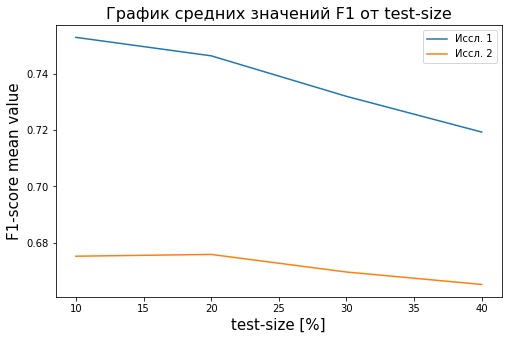

In [250]:
x = [10, 20, 30, 40]
y1 = f1_means
y2 = f1n_means

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'Иссл. 1')
ax.plot(x, y2, label = 'Иссл. 2')

ax.legend()
plt.title('График средних значений F1 от test-size', fontsize=16)
plt.xlabel('test-size [%]', fontsize=15)
plt.ylabel('F1-score mean value', fontsize=15)

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

Средняя разность между метрикой F1 и accuracy так же больше в исследовании 2, что помогает нам сделать вывод, что при неравномерной распределении меток в исходном наборе данных можно сделать неверные выводы, пологаясь только на одну из метрик

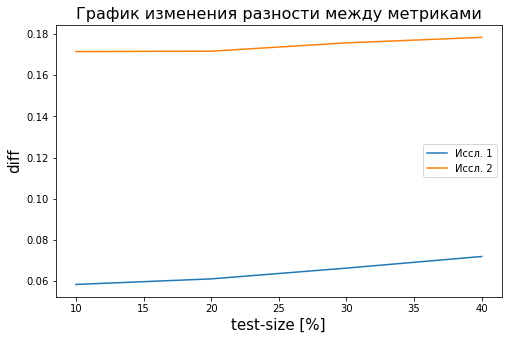

In [252]:
x = [10, 20, 30, 40]
y1 = diff
y2 = diff1

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'Иссл. 1')
ax.plot(x, y2, label = 'Иссл. 2')

ax.legend()
plt.title('График изменения разности между метриками', fontsize=16)
plt.xlabel('test-size [%]', fontsize=15)
plt.ylabel('diff', fontsize=15)

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

**Итого**: при равномерном распределении меток в исходном наборе данных, точность модели выше и мы можем полагаться как и на F1 метрику, так и на accuracy, так как средняя разность между значенями этих метрик не велика. В случае же неравномерного распределния меток в исходном наборе данных, точность модели уменьшается и пологаться только на одну из метрик опасно, так как можно прийти к неверным выводам из-за того, что они в среднем сильно отличаются, а именно на 0.17